In [0]:
% cd /content/drive/My Drive/Colab Notebooks/csce636/course_project
!pip install jsonlines
% ls

In [0]:
!cp -r /content/drive/My\ Drive/Colab\ Notebooks/csce636/course_project/train /content
!cp -r /content/drive/My\ Drive/Colab\ Notebooks/csce636/course_project/test /content

In [0]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
train_dir='/content/train'
val_dir='/content/test'
test_dir='/content/cut'


train_generator = datagen.flow_from_directory(
    directory=train_dir,
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=64,
    class_mode="binary",
    shuffle=True,
    seed=42
)

valid_generator = datagen.flow_from_directory(
    directory=val_dir,
    target_size=(299, 299),
    color_mode="rgb",
    batch_size=64,
    class_mode="binary",
    shuffle=True,
    seed=42
)


In [0]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

# create the base pre-trained model
base_model = InceptionV3(weights='imagenet', 
                         include_top=False,
                         input_shape=(299,299,3),
                         pooling=None
                         )



In [0]:
from keras.callbacks import ModelCheckpoint
# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)

# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in base_model.layers:
    layer.trainable = False

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer=optimizers.RMSprop(lr=0.0001), loss='binary_crossentropy', 
              metrics=['acc'])
#model.compile(loss=losses.binary_crossentropy,
            #optimizer=optimizers.RMSprop(lr=0.0001),
            #metrics=[metrics.binary_accuracy])


filepath="model1.5_{epoch:02d}-{val_loss:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, 
                            save_best_only=True)

# train the model on the new data for a few epochs
history = model.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs=60,
                    callbacks=[checkpoint]

)


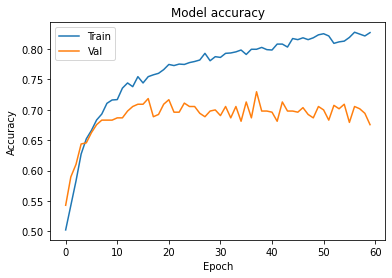

In [12]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

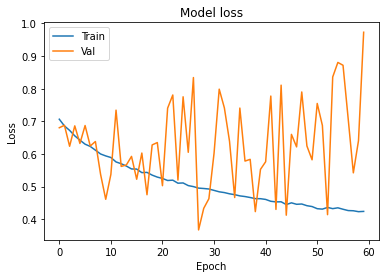

In [13]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:


for i, layer in enumerate(base_model.layers):
   print(i, layer.name)



In [0]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:


x2 = base_model.output
x2 = GlobalAveragePooling2D()(x2)
predictions2 = Dense(1, activation='sigmoid')(x2)

# this is the model we will train
model2 = Model(inputs=base_model.input, outputs=predictions2)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model2.layers[:249]:
   layer.trainable = False
for layer in model2.layers[249:]:
   layer.trainable = True

# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from keras.optimizers import SGD
model2.compile(optimizer=SGD(lr=0.001, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['acc'])

# compile the model (should be done *after* setting layers to non-trainable)
#model.compile(optimizer='rmsprop', loss='binary_crossentropy', 
              #metrics=['acc'])


filepath="model_l1.3_{epoch:02d}-{val_loss:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, 
                            save_best_only=True)

# train the model on the new data for a few epochs
history = model2.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs=60,
                    callbacks=[checkpoint]

)


In [0]:
base_model.summary()

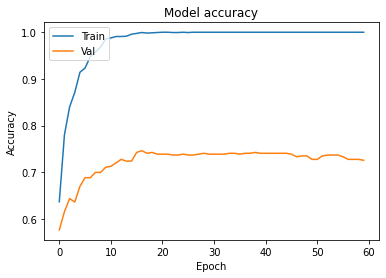

In [18]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

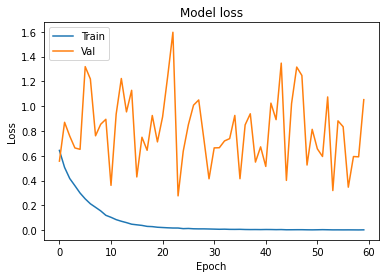

In [19]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

2. Fully connected layer

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
# add a global spatial average pooling layer
y = base_model.output
y=Flatten()(y)
y = Dense(256, activation='relu')(y)

#model.add(layers.Flatten(input_shape=(7,7,512)))
#model.add(layers.Dense(256, activation='relu', input_dim=(7*7*512)))
#model.add(layers.Dropout(0.5))
#model.add(layers.Dense(1, activation='sigmoid'))
#model.summary()
predictions3 = Dense(1, activation='sigmoid')(y)

# this is the model we will train
model3 = Model(inputs=base_model.input, outputs=predictions3)

# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in model3.layers[:280]:
   layer.trainable = False
for layer in model3.layers[280:]:
   layer.trainable = True


# compile the model (should be done *after* setting layers to non-trainable)
model3.compile(optimizer=SGD(lr=0.001, momentum=0.9), loss='binary_crossentropy', 
              metrics=['acc'])
#model.compile(loss=losses.binary_crossentropy,
            #optimizer=optimizers.RMSprop(lr=0.0001),
            #metrics=[metrics.binary_accuracy])


filepath="model3.2_{epoch:02d}-{val_loss:.2f}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1, 
                            save_best_only=True)

# train the model on the new data for a few epochs
history = model3.fit_generator(generator=train_generator,
                    validation_data=valid_generator,
                    epochs=50,
                    callbacks=[checkpoint]

)


In [0]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

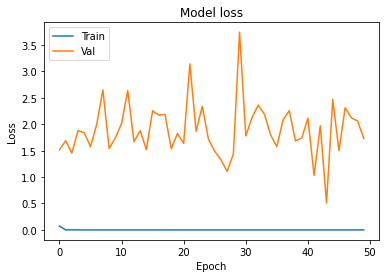

In [22]:
import matplotlib.pyplot as plt
#Visualize the models accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()